# Cabinetry exploration 

**Goal:** Let's try to formalize some of the metrics that I think are interesting.

I like the vizualizations of cabinetry, and the way it's v streamlined to do all the fits, etc, but in this nb, I'm going to take the notebook that I created in `min_dR_training` and make modified workspaces from the main workspace.



In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from glob import glob
from tqdm import tqdm 

import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.stats import pearsonr

from plotUtils import significance

from matplotlib import cm
import numpy as np

import os
os.sys.path += ['../gp-for-flows/','../PyATLASstyle/','../../hh4b/hh4b-plots/'] 


from gp import *
from flows import *
from bkgPred import *

import cabinetry
cabinetry.set_logging()

import copy
import json
import pathlib

import boost_histogram as bh
import hist
import pyhf
from pyhf.contrib.utils import download

# Let's do ATLAS style plots too!
import matplotlib as mpl
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

from hh4b_plots.colors import *


%load_ext autoreload
%autoreload 2

## Setup

In [25]:
nSeeds = 25

**Load in the workspace from before**

In [51]:
ws_in = json.load(open("workspaces/ggf_2b_flow0.json"))

In [52]:
ws_in.keys()

dict_keys(['channels', 'measurements', 'observations', 'version'])

In [53]:
ws_in.keys()

dict_keys(['channels', 'measurements', 'observations', 'version'])

In [54]:
ws_in['channels'][0].keys()

dict_keys(['name', 'samples'])

In [55]:
for sample in ws_in['channels'][0]['samples']:
    print(sample.keys(),sample['name'])

dict_keys(['data', 'modifiers', 'name']) Signal
dict_keys(['data', 'modifiers', 'name']) Background


In [56]:
sample['data']

[19.04,
 63.4,
 93.48,
 78.84,
 61.04,
 39.48,
 32.48,
 24.28,
 20.84,
 18.12,
 15.52,
 10.16,
 6.28,
 4.32,
 3.0]

In [57]:
nfs = [mod_dict['data']['hi'] for mod_dict in sample['modifiers'] 
       if mod_dict['type']=='normsys']

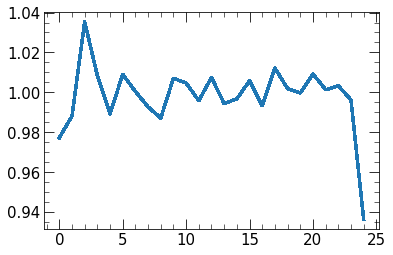

In [58]:
plt.plot(nfs)

## Fix the signal strength to 0 for background only fits

In [59]:
ws_in["measurements"][0]["config"]["parameters"] = [{"name": "Signal_norm", 
                                                     "inits": [0], 
                                                     "fixed": True}]

In [60]:
ws = pyhf.Workspace(ws_in)

INFO - pyhf.workspace - Validating spec against schema: workspace.json


## Get fit results restricting to a subset of these NPs

490.2799999999999 490.28000000000003


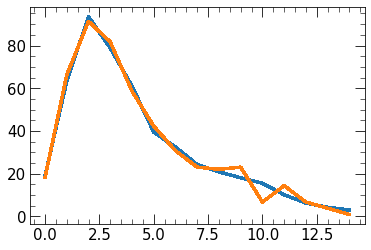

In [61]:
plt.plot(sample['data'])

plt.plot(mod_dict['data']['hi_data'])

print(np.sum(sample['data']),
      np.sum(mod_dict['data']['hi_data']))

In [62]:
sample['modifiers']

[{'data': [0.8726969691708572,
   1.5924823389915506,
   1.9337011144434912,
   1.7758378304338491,
   1.5625619987699688,
   1.2566622457924006,
   1.1398245479020006,
   0.9854947995803935,
   0.9130169768410662,
   0.8513518661517105,
   0.7879086241436883,
   0.6374950980203691,
   0.5011985634456667,
   0.41569219381653055,
   0.34641016151377546],
  'name': 'staterror_SRin_eta_0_0p5',
  'type': 'staterror'},
 {'data': {'hi': 0.9771751008732112, 'lo': 1.0228248991267888},
  'name': 'bootstraps_eigen0',
  'type': 'normsys'},
 {'data': {'hi_data': [21.98203626460198,
    64.86600593707125,
    95.16507622607934,
    76.72095171344888,
    59.01341337051983,
    38.79278310195708,
    32.11765238571031,
    22.86477445744817,
    21.111263591377693,
    18.629294525806323,
    16.147045403134065,
    10.200097040845723,
    6.112786288229152,
    3.6916551842147705,
    2.8651645095555707],
   'lo_data': [16.097963735398018,
    61.93399406292875,
    91.79492377392067,
    80.959048

In [63]:
len('bootstraps_eigen0')

17

In [64]:
'bootstraps_eigen0'[16:]

'0'

In [65]:
model, data = cabinetry.model_utils.model_and_data(ws)

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier staterror_SRin_eta_0_0p5 (15 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Signal_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bootstraps_eigen0 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bootstraps_eigen1 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bootstraps_eigen2 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bootstraps_eigen3 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bootstraps_eigen4 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bootstraps_eigen5 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bootstraps_eigen6 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bootstraps_eigen7 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bootstraps_eigen8 (1 new nuisanc

In [67]:
sample['modifiers']

[{'data': [0.8726969691708572,
   1.5924823389915506,
   1.9337011144434912,
   1.7758378304338491,
   1.5625619987699688,
   1.2566622457924006,
   1.1398245479020006,
   0.9854947995803935,
   0.9130169768410662,
   0.8513518661517105,
   0.7879086241436883,
   0.6374950980203691,
   0.5011985634456667,
   0.41569219381653055,
   0.34641016151377546],
  'name': 'staterror_SRin_eta_0_0p5',
  'type': 'staterror'},
 {'data': {'hi': 0.9771751008732112, 'lo': 1.0228248991267888},
  'name': 'bootstraps_eigen0',
  'type': 'normsys'},
 {'data': {'hi_data': [21.98203626460198,
    64.86600593707125,
    95.16507622607934,
    76.72095171344888,
    59.01341337051983,
    38.79278310195708,
    32.11765238571031,
    22.86477445744817,
    21.111263591377693,
    18.629294525806323,
    16.147045403134065,
    10.200097040845723,
    6.112786288229152,
    3.6916551842147705,
    2.8651645095555707],
   'lo_data': [16.097963735398018,
    61.93399406292875,
    91.79492377392067,
    80.959048

In [66]:
for mod in sample['modifiers'] :
    print(mod['name'][16:])

ta_0_0p5
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24


In [69]:
sample['modifiers'] 

[{'data': [0.8726969691708572,
   1.5924823389915506,
   1.9337011144434912,
   1.7758378304338491,
   1.5625619987699688,
   1.2566622457924006,
   1.1398245479020006,
   0.9854947995803935,
   0.9130169768410662,
   0.8513518661517105,
   0.7879086241436883,
   0.6374950980203691,
   0.5011985634456667,
   0.41569219381653055,
   0.34641016151377546],
  'name': 'staterror_SRin_eta_0_0p5',
  'type': 'staterror'},
 {'data': {'hi': 0.9771751008732112, 'lo': 1.0228248991267888},
  'name': 'bootstraps_eigen0',
  'type': 'normsys'},
 {'data': {'hi_data': [21.98203626460198,
    64.86600593707125,
    95.16507622607934,
    76.72095171344888,
    59.01341337051983,
    38.79278310195708,
    32.11765238571031,
    22.86477445744817,
    21.111263591377693,
    18.629294525806323,
    16.147045403134065,
    10.200097040845723,
    6.112786288229152,
    3.6916551842147705,
    2.8651645095555707],
   'lo_data': [16.097963735398018,
    61.93399406292875,
    91.79492377392067,
    80.959048

In [71]:
for mod in sample['modifiers']:
    if ('staterror' not in mod['name']) and (int(mod['name'][16:]) <= i):
        print(mod)

{'data': {'hi': 0.9771751008732112, 'lo': 1.0228248991267888}, 'name': 'bootstraps_eigen0', 'type': 'normsys'}
{'data': {'hi_data': [21.98203626460198, 64.86600593707125, 95.16507622607934, 76.72095171344888, 59.01341337051983, 38.79278310195708, 32.11765238571031, 22.86477445744817, 21.111263591377693, 18.629294525806323, 16.147045403134065, 10.200097040845723, 6.112786288229152, 3.6916551842147705, 2.8651645095555707], 'lo_data': [16.097963735398018, 61.93399406292875, 91.79492377392067, 80.95904828655112, 63.06658662948017, 40.167216898042916, 32.842347614289686, 25.69522554255183, 20.568736408622307, 17.61070547419368, 14.892954596865934, 10.119902959154278, 6.447213711770848, 4.94834481578523, 3.1348354904444293]}, 'name': 'bootstraps_eigen0', 'type': 'histosys'}


In [106]:
bkg_mods = sample['modifiers']

In [108]:
i=0
bkg_mods[:1+2*(i+1)]

[{'data': [0.8726969691708572,
   1.5924823389915506,
   1.9337011144434912,
   1.7758378304338491,
   1.5625619987699688,
   1.2566622457924006,
   1.1398245479020006,
   0.9854947995803935,
   0.9130169768410662,
   0.8513518661517105,
   0.7879086241436883,
   0.6374950980203691,
   0.5011985634456667,
   0.41569219381653055,
   0.34641016151377546],
  'name': 'staterror_SRin_eta_0_0p5',
  'type': 'staterror'},
 {'data': {'hi': 0.9771751008732112, 'lo': 1.0228248991267888},
  'name': 'bootstraps_eigen0',
  'type': 'normsys'},
 {'data': {'hi_data': [21.98203626460198,
    64.86600593707125,
    95.16507622607934,
    76.72095171344888,
    59.01341337051983,
    38.79278310195708,
    32.11765238571031,
    22.86477445744817,
    21.111263591377693,
    18.629294525806323,
    16.147045403134065,
    10.200097040845723,
    6.112786288229152,
    3.6916551842147705,
    2.8651645095555707],
   'lo_data': [16.097963735398018,
    61.93399406292875,
    91.79492377392067,
    80.959048

In [113]:
len(wsi['channels'])

6

In [175]:
fit_list = []
models = []

for i in tqdm(range(nSeeds-1)):
    
    wsi = copy.deepcopy(ws_in)
    
    for i_chan in range(6):
        bkg_mods = wsi['channels'][i_chan]['samples'][1]['modifiers']
        wsi['channels'][i_chan]['samples'][1]['modifiers'] = bkg_mods[:1+2*(i+1)]
    
    #mi = pyhf.Workspace(wsi).model()
    mi,di = cabinetry.model_utils.model_and_data(wsi)
    
    #bi_fit = cabinetry.fit.fit(mi, di)

    models.append(mi)
    fit_list.append(bi_fit)
    

  0%|          | 0/24 [00:00<?, ?it/s]INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier staterror_SRin_eta_0_0p5 (15 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Signal_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bootstraps_eigen0 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier staterror_SRin_eta_0p5_1 (15 new nuisance parameters)
INFO - pyhf.pdf - adding modifier staterror_SRin_eta_1_1p5 (15 new nuisance parameters)
INFO - pyhf.pdf - adding modifier staterror_SRout_eta_0_0p5 (15 new nuisance parameters)
INFO - pyhf.pdf - adding modifier staterror_SRout_eta_0p5_1 (15 new nuisance parameters)
INFO - pyhf.pdf - adding modifier staterror_SRout_eta_1_1p5 (15 new nuisance parameters)
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.p

/u/ki/nhartman/gpfs/miniconda3/envs/my_env/lib/python3.8/site-packages/matplotlib/ticker.py:2788: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/u/ki/nhartman/gpfs/miniconda3/envs/my_env/lib/python3.8/site-packages/matplotlib/ticker.py:2788: RuntimeWarning: invalid value encountered in double_scalars
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
DEBUG - cabinetry.visualize.utils - saving figure as figures/pulls.pdf
WARNING - fontTools.ttLib.tables._h_e_a_d - 'created' timestamp seems very low; regarding as unix timestamp
WARNING - fontTools.ttLib.tables._h_e_a_d - 'modified' timestamp seems very low; regarding as unix timestamp


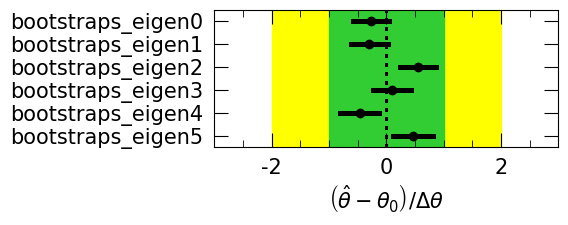

In [154]:
i= 5
cabinetry.visualize.pulls(fit_dict[i], exclude="Signal_norm")

/u/ki/nhartman/gpfs/miniconda3/envs/my_env/lib/python3.8/site-packages/matplotlib/ticker.py:2788: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/u/ki/nhartman/gpfs/miniconda3/envs/my_env/lib/python3.8/site-packages/matplotlib/ticker.py:2788: RuntimeWarning: invalid value encountered in double_scalars
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
DEBUG - cabinetry.visualize.utils - saving figure as figures/pulls.pdf
WARNING - fontTools.ttLib.tables._h_e_a_d - 'created' timestamp seems very low; regarding as unix timestamp
WARNING - fontTools.ttLib.tables._h_e_a_d - 'modified' timestamp seems very low; regarding as unix timestamp


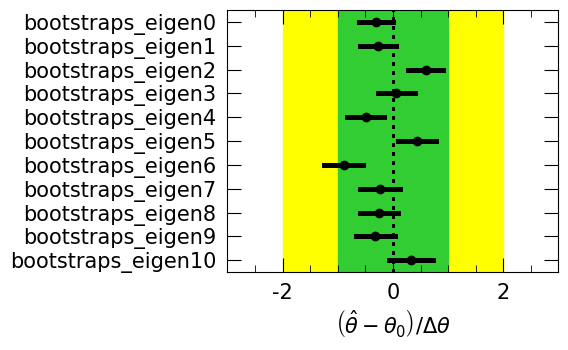

In [155]:
i= 10
cabinetry.visualize.pulls(fit_dict[i], exclude="Signal_norm")

In [159]:
data = np.array(di[:90])

In [194]:
i=10

mi = models[i]

prefit_yields = []
postfit_yields = []

chi2_pre = []
chi2_post = []

# The prefit is the same for every single model (by defn)
prefit  = cabinetry.model_utils.prediction(mi,label='prefit')
x = np.hstack([c[0] for c in prefit.model_yields])
chi2_pre = (data-x)**2 / (90 * x)

for i, mi in tqdm(enumerate(models)):

    postfit = cabinetry.model_utils.prediction(mi,label='postfit', fit_results=fit_dict[i])
    
    y = np.hstack([c[0] for c in postfit.model_yields])
    
    postfit_yields.append(y)
   
    chi2_post.append( np.sum( (y-data)**2 / (90 * y)) )

0it [00:00, ?it/s]DEBUG - cabinetry.model_utils - total stdev is [[1.39, 1.7, 2.25, 2.37, 2.12, 1.26, ... 1.24, 1.06, 1.31, 0.991, 0.751, 0.882]]
DEBUG - cabinetry.model_utils - total stdev per channel is [5.84, 5.19, 4.29, 7.25, 6.13, 5.71]
2it [00:02,  1.11s/it]DEBUG - cabinetry.model_utils - total stdev is [[1.57, 2.34, 3.03, 2.47, 2.53, 1.33, 1.02, ... 1.51, 1.2, 1.3, 1, 0.802, 0.916]]
DEBUG - cabinetry.model_utils - total stdev per channel is [8.52, 5.45, 6.03, 8.72, 6.78, 9.45]
3it [00:04,  1.81s/it]DEBUG - cabinetry.model_utils - total stdev is [[1.61, 2.56, 3.03, 2.79, 2.59, 1.48, 1.03, ... 1.56, 1.36, 1.3, 1.44, 0.802, 1.08]]
DEBUG - cabinetry.model_utils - total stdev per channel is [8.65, 5.45, 6.23, 9.66, 6.93, 9.8]
4it [00:08,  2.41s/it]DEBUG - cabinetry.model_utils - total stdev is [[1.62, 2.57, 3.05, 3.01, 2.62, 1.51, 1.24, ... 1.63, 1.36, 1.34, 1.45, 0.805, 1.08]]
DEBUG - cabinetry.model_utils - total stdev per channel is [8.96, 6.64, 6.52, 9.68, 7.16, 9.93]
5it [00:12,

In [207]:
chi2_post =[  np.sum( (y-data)**2 / (90 * y))  for y in postfit_yields]

In [208]:
chi2_post

[0.9648918845634948,
 0.9594298960694193,
 0.9384778272762655,
 0.9384677259483717,
 0.9220723110229317,
 0.9058570522854809,
 0.8539851620544505,
 0.8495338943520304,
 0.845947602757683,
 0.8395099595477711,
 0.8329754474208111,
 0.8323689903548057,
 0.8308822991481795,
 0.8308998502766118,
 0.8308543582271736,
 0.8082120972942358,
 0.8082363620782583,
 0.8074090106845109,
 0.7953058142031056,
 0.7840701260040933,
 0.7812380787503636,
 0.737180072945367,
 0.6857097719380209,
 0.6624810853051482]

(1.0, 25.0)

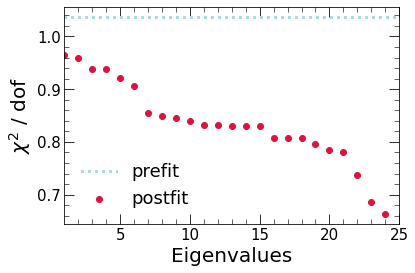

In [214]:
plt.plot([1,25],[chi2_pre]*2,color='lightblue',ls='dotted',label='prefit')

plt.scatter(range(1,nSeeds),chi2_post,color='crimson',label='postfit')

plt.xlabel('Eigenvalues',fontsize=20)
plt.ylabel('$\chi^2$ / dof',fontsize=20)

plt.legend(fontsize=18)
plt.xlim(1,25)

In [186]:
x = np.hstack([c[0] for c in prefit.model_yields])
y = np.hstack([c[0] for c in postfit.model_yields])

In [184]:
np.sum((data-x)**2/x)

93.36429026368853

In [185]:
np.sum((data-y)**2/y)

74.967790267873

array([ 19.31323038,  68.53703828, 104.74567658,  77.20799302,
        61.63234649,  41.58709915,  33.20212858,  29.85021157,
        20.00773403,  18.81347283,  12.78999273,  11.80939593,
         6.1281011 ,   4.08115545,   2.78296231,  12.59895374,
        40.1937873 ,  77.14190147,  77.30901536,  68.70512618,
        51.85487785,  35.07281648,  27.17009102,  22.95950426,
        20.15017634,  14.29937662,  12.80371833,   7.7714662 ,
         4.07589087,   4.55288073,   4.9993514 ,  21.56113572,
        55.69611947,  76.47391028,  76.68673854,  57.89055311,
        41.00278542,  32.48572208,  24.73888687,  21.30914266,
        15.50308322,  13.49892426,   8.66591295,   6.5250511 ,
         7.47581663,  36.62114313, 106.2921798 , 161.77259289,
       151.31390595, 106.48987269,  77.96628888,  52.9177364 ,
        48.49717948,  39.74326797,  36.72457745,  27.95918729,
        17.39679787,  12.47750369,   6.77223675,   6.00333547,
        19.1492023 ,  72.4896386 , 128.3426857 , 140.58